## Day 24: Business Data Analysis 


For this challenge, you are going to work with an Excel file 
called Asset_sales_data. 


1. Using pandas import the Excel file above. Write a code to 
view the first 5 rows of your DataFrame. 

In [9]:
import pandas as pd

df = pd.read_excel("Asset_sales_data.xlsx")

df.head()

,date,products,sales
0,11-20-2021,cars,19234
1,12-12-2021,boats,87598
2,11-07-2021,cars,15900
3,12-06-2021,boats,12087
4,12-09-2021,cars,56897


2. Write another code that will return the data types of all the 
columns in the DataFrame. 

In [12]:
df.dtypes

date        object
products    object
sales        int64
dtype: object

3. Using pandas, what month had the highest value of sales? 


In [15]:
df["month"] = pd.to_datetime(df["date"]).dt.month
df.head()

,date,products,sales,month
0,11-20-2021,cars,19234,11
1,12-12-2021,boats,87598,12
2,11-07-2021,cars,15900,11
3,12-06-2021,boats,12087,12
4,12-09-2021,cars,56897,12


In [32]:
df["month"].max()

np.int32(12)

In [27]:
df.groupby(df["month"]).sum(numeric_only=True)

,sales
month,
11,111736
12,565688


In [33]:
df.groupby(df["month"]).sum(numeric_only=True).idxmax()

sales    12
dtype: int32

4. Write a code to return the value of sales between 11-20
2021 and 12-06-2021. Create a DataFrame and return the 
total sales value for this period. 

In [37]:
df2 = df.loc[(df["date"] >= '11-20-2021') & (df["date"] <= '12-06-2021')]
print(df2)

          date products  sales  month
0   11-20-2021     cars  19234     11
3   12-06-2021    boats  12087     12
5   12-06-2021   houses  19345     12
6   11-20-2021     cars  19234     11
8   12-06-2021   houses  20989     12
10  12-06-2021    boats  12087     12
12  11-25-2021     cars  22234     11
14  12-06-2021    boats  14987     12
16  11-20-2021     cars  19234     11


In [39]:
df2["sales"].sum()

np.int64(159431)

5. Using Matplotlib, create a pie chart of the products and 
their sales values as percentages. Your chart should have 
labels and a title. Add explode (0, 0.1, 0) and a shadow. 

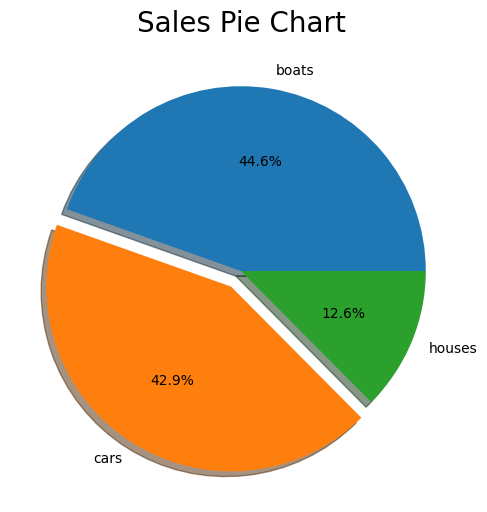

In [46]:
import matplotlib.pyplot as plt 

prod_sales = df.groupby(["products"])["sales"].sum()

explode = (0, 0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(prod_sales,
        explode=explode,
        labels=prod_sales.index,
        autopct="%1.1f%%",
        shadow=True)

plt.title("Sales Pie Chart", fontsize=20)
plt.show()

6. Use pandas to create a pivot table and calculate the sum of 
the sales column grouped by the products column. This will 
give you the total sales for each product. Use pandas and 
Matplotlib to plot this on a bar plot. Your plot size must be: 
width = 12, height = 10. Your plot title will be "Total Sales 
Per Product."  

In [47]:
sales_per_product = df.pivot_table(
    values="sales",
    index="products",
    aggfunc="sum"
)

sales_per_product

,sales
products,
boats,301955
cars,290427
houses,85042


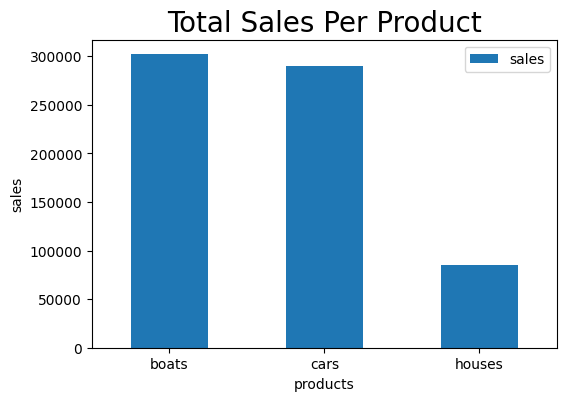

In [49]:
sales_per_product.plot(kind="bar", figsize=(6, 4))
plt.title("Total Sales Per Product", fontsize=20)
plt.xticks(rotation=0)
plt.ylabel("sales")
plt.show()
